## Exercise 2
* **Dataset:** [`Red wine`](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)
* **Model to use:** [`Random Forest`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* **Model evaluation:** [`ROC curve`](https://intellipaat.com/blog/roc-curve-in-machine-learning/)

Give a try to `Random Forest` with the `Red Wine` dataset!

This time, after using the classification report, also check the [ROC curve](https://intellipaat.com/blog/roc-curve-in-machine-learning/).

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
#import graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [47]:
wine = pd.read_csv('/home/regis/Desktop/ANT-Theano-2-27_regression_classification/4.machine_learning/2.Classification/assets/archive/winequality-red.csv')

In [48]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [49]:
for col in wine:
    print(col)
    print(type(col))
    print(f'NaN values: {wine[col].isnull().sum()}')
    print(f'number of unique values: {wine[col].nunique()}')
    print(f'unique values: {wine[col].unique()}')
    print('==========')

fixed acidity
<class 'str'>
NaN values: 0
number of unique values: 96
unique values: [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
volatile acidity
<class 'str'>
NaN values: 0
number of unique values: 143
unique values: [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1

Notice that quality currently is of type string, should be changed to integer

In [50]:
wine['quality'] = wine['quality'].astype(int)

In [51]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

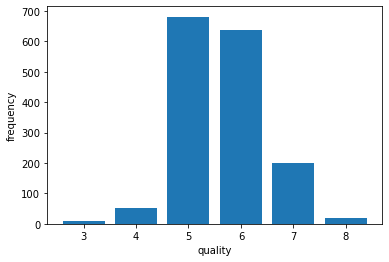

In [52]:
quality_dist = wine['quality'].value_counts()
plt.bar(quality_dist.index, quality_dist)
plt.xlabel('quality')
plt.ylabel('frequency')
plt.show()

The quality of the red wines are in the set  {3,4,5,6,7,8} . We want to classify the wine into so-called 'bad' and 'good'. We study statistics of our dataset to determine how to make a classification.

In [53]:
wine['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

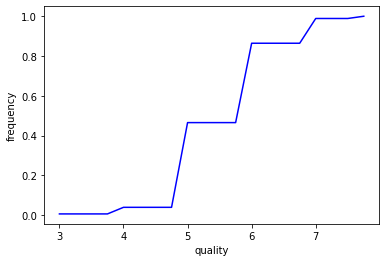

In [54]:
values, base = np.histogram(wine['quality'], bins=20)
kumulativ = np.cumsum(values/wine.shape[0])
plt.plot(base[:-1], kumulativ, c='blue')
plt.xlabel('quality')
plt.ylabel('frequency')
plt.show()

Since the median quality is  6  and mean quaity is  ∼5,6 , we classify red wine as 'poor' if quality is less then or equal to  6 , otherwise we classify the red wine as 'good'. We repleace the column quality with the value  0  for 'poor' wine and the value  1  for 'good' wine.

In [55]:
#do not rerun code because than everything becomes bad wine due to first run returning 0 or 1 values
good_wine_index = wine.loc[wine['quality'] <= 6].index
bad_wine_index = wine.loc[wine['quality'] > 6].index
wine.iloc[good_wine_index, wine.columns.get_loc('quality')] = 0
wine.iloc[bad_wine_index, wine.columns.get_loc('quality')] = 1

In [56]:
good_wine_index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    9,   10,   11,
            ...
            1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598],
           dtype='int64', length=1382)

In [57]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

## Random Forest
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [58]:
x = wine.drop('quality',axis=1)
y = wine['quality']

In [59]:
#Choosing 40% as training data.
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.40, random_state = 42)

In [60]:
# Making a decision tree with two levels.
clfTre = tree.DecisionTreeClassifier(max_depth=2)
clfTre.fit(xTrain, yTrain)

DecisionTreeClassifier(max_depth=2)

In [ ]:
#Visualizing the decision tree
dot_data = tree.export_graphviz(clfTre, out_file=None, max_depth=2, feature_names=list(x.columns.values), filled=True, rounded=True)
valgTre = graphviz.Source(dot_data) 
valgTre